
Name: Anuva Negi

ID: 1002238067

##Naïve Bayes Classifier:

In [48]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_text

In [49]:
unloaded = files.upload()

Saving dataset_NB.csv to dataset_NB (2).csv


In [50]:
df = pd.read_csv('dataset_NB.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [52]:
df.isna().sum() # there are nan values present

,0
email,1
label,0


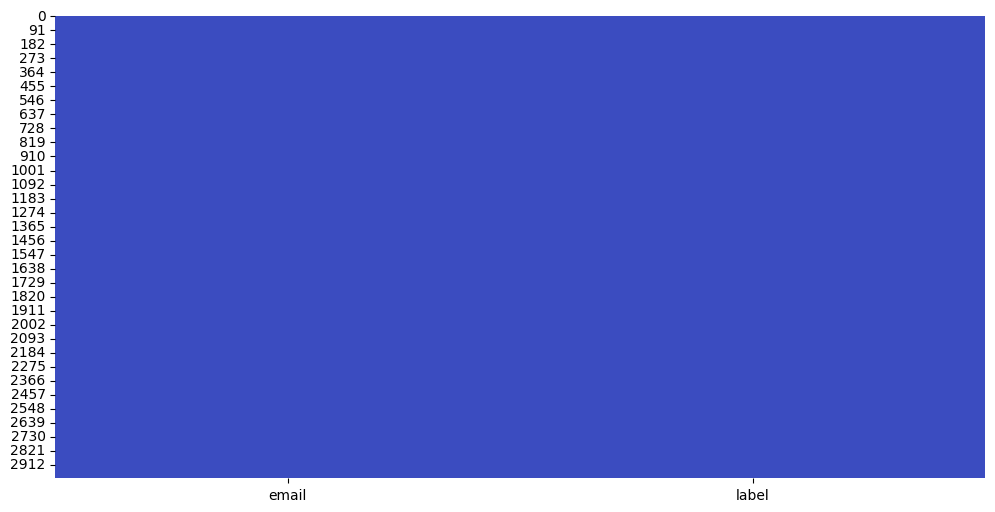

In [53]:
df['email'].isnull().sum()
plt.figure(figsize=(12,6))  # Adjust size as needed
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.show()   # unable to see that one nan value using sns heatmap

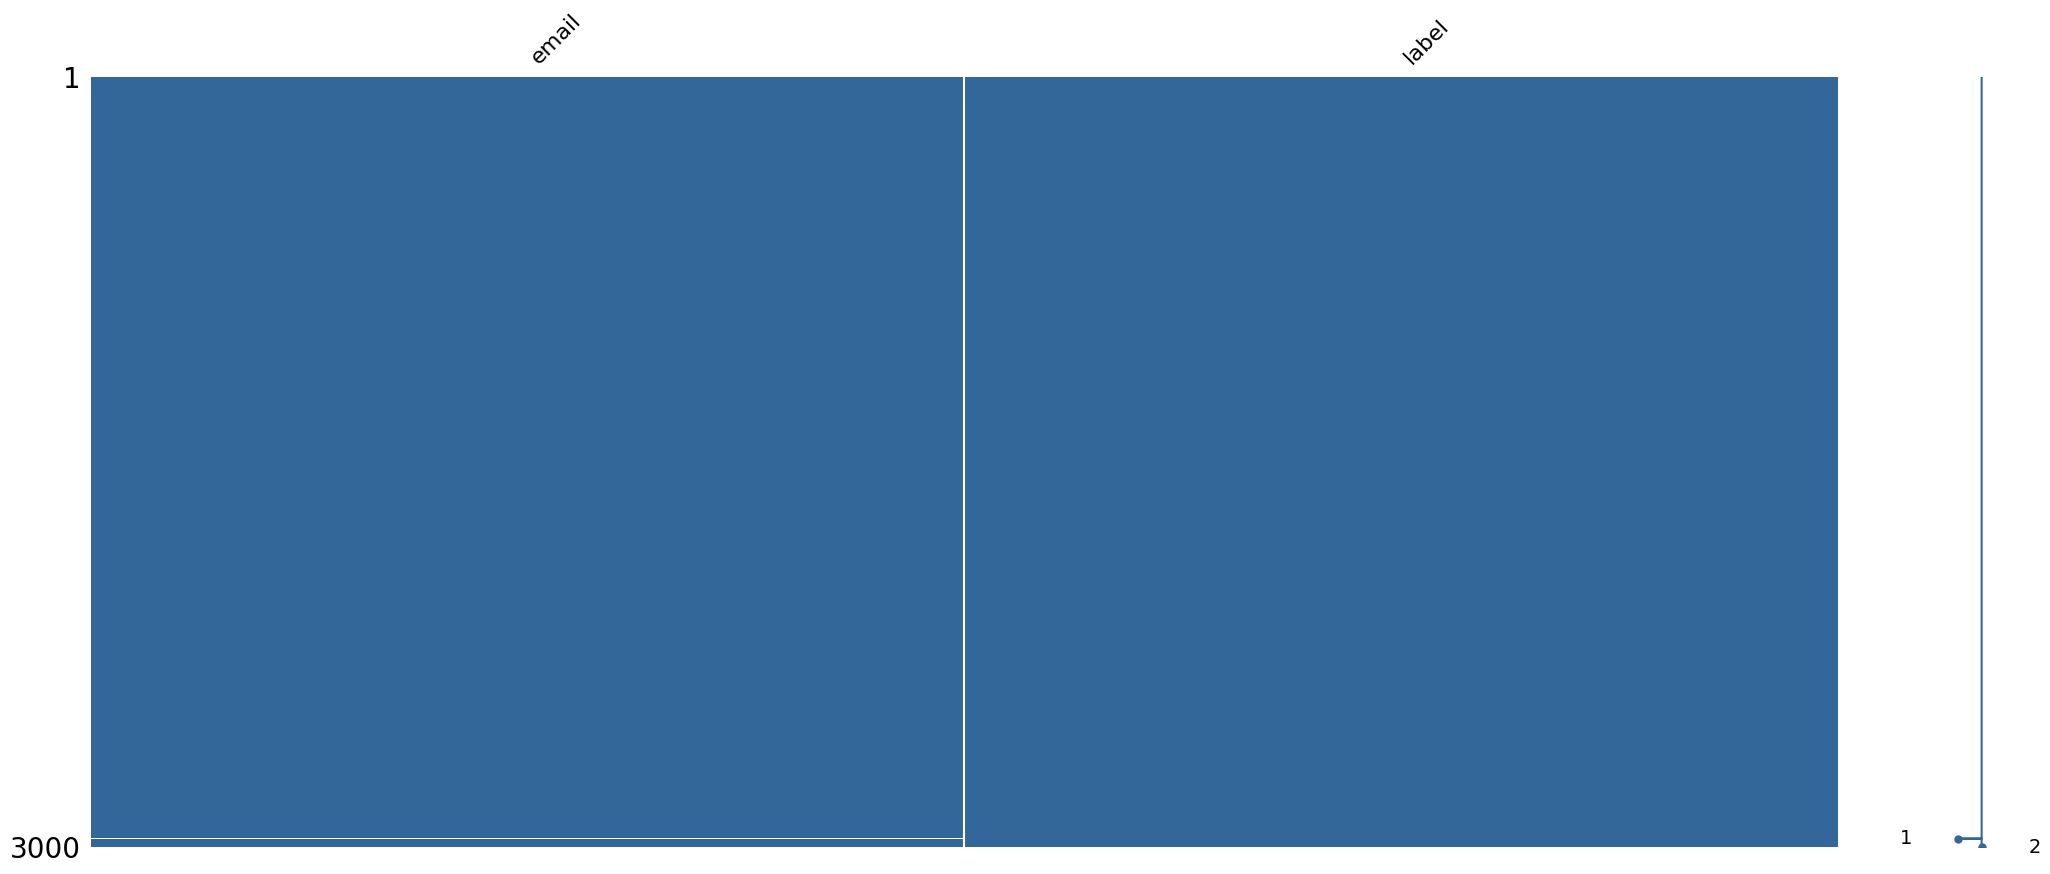

In [54]:
# import missingno for its matrix() for better visualization
import missingno as msno

# Visualize missing data with a matrix plot
msno.matrix(df, color=(0.2, 0.4, 0.6))
plt.show()

Imputing ' ' for that one nan value present in email col

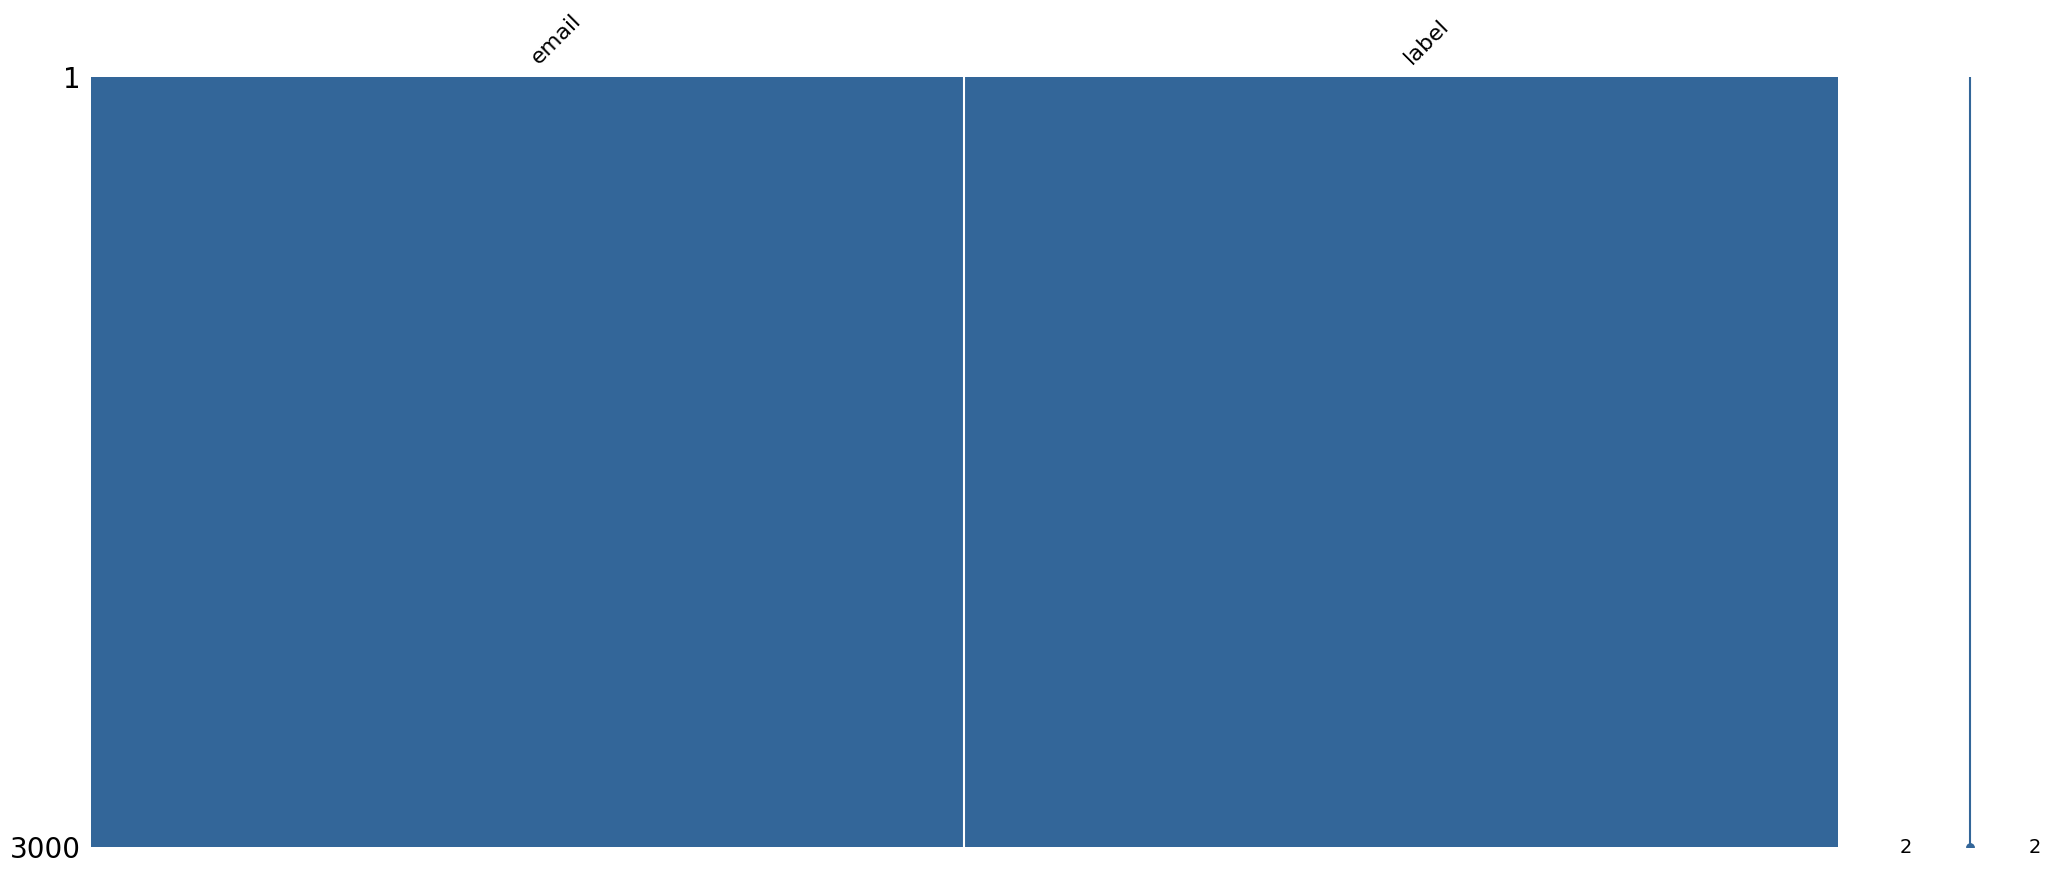

In [55]:
df['email'] = df['email'].fillna('')  # imputation is safer rather than droping the row
msno.matrix(df, color=(0.2, 0.4, 0.6))
plt.show()

##Extract features from the text (email) and transforming it
###1. Using Tf-Idf Vectorization

Approach:
We used a dataset containing emails and their corresponding labels (spam or not spam). The textual email data cannot be directly fed into a model, so we used the Tf-Idf Vectorizer to extract features by converting the text into a numerical representation. Tf-Idf helps capture important words by considering their frequency within emails and across the dataset.

In [56]:
# Text feature extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['email'])  # Features

# Target variable (Label: spam or not spam)
y = df['label']


In [57]:
print(X.shape)  # converted into matrix
print(y.shape)

(3000, 3000)
(3000,)


##Split the dataset into training and test sets (80% training and 20% testing).

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Train Naive Bayes model (GaussianNB).
We trained the GaussianNB classifier using the training data. The Naive Bayes model is chosen due to its simplicity and effectiveness in text classification tasks.

In [59]:
# Convert the sparse matrix to a dense array for GaussianNB
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Train the model
model = GaussianNB()
model.fit(X_train_dense, y_train)

GaussianNB()

Since GaussianNB works better with dense data and TfidfVectorizer outputs sparse matrices therefore, we convert them to dense format.

In [60]:
# Predict on the test set
y_pred = model.predict(X_test_dense)

Accuracy: 0.9616666666666667



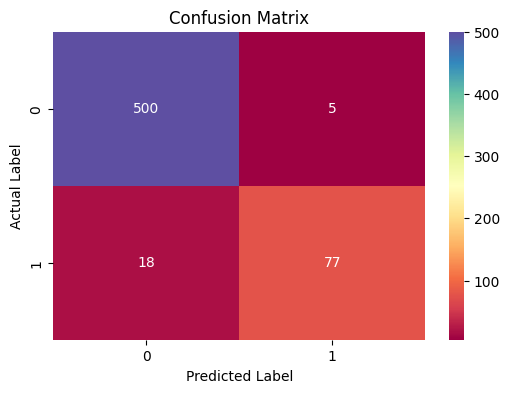

In [61]:
from sklearn import metrics
# Accuracy score
tfidf_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {tfidf_accuracy}\n')

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report_tf = metrics.classification_report(y_test, y_pred)  # to check precision

# Plot the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###2. Use Bag of Words (CountVectorizer) for feature extraction:

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Text feature extraction using Bag of Words (CountVectorizer)
count_vectorizer = CountVectorizer(stop_words='english', max_features=3000)  # Limit to 3000 most frequent words
X = count_vectorizer.fit_transform(df['email'])  # Features

# Target variable (Label: spam or not spam)
y = df['label']

In [63]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Convert the sparse matrix to a dense array for GaussianNB
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

Since CountVectorizer also outputs sparse matrices, we need to convert them to dense format for GaussianNB.

In [65]:
# Train the model
model = GaussianNB()
model.fit(X_train_dense, y_train)

y_pred = model.predict(X_test_dense)

Accuracy: 0.915



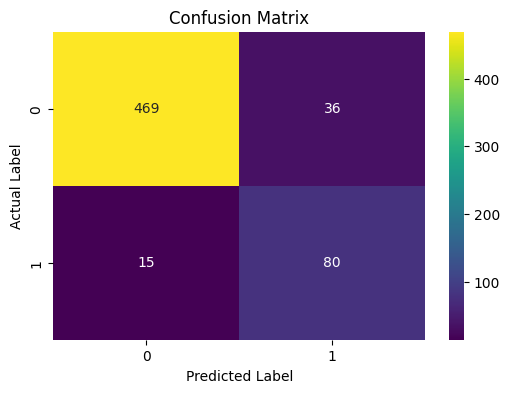

In [66]:
# Accuracy score
bagofWords_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {bagofWords_accuracy}\n')

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report_bob = metrics.classification_report(y_test, y_pred)  # to check precision

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

##Comparing Accuracies for the feature extraction technique

We can even observe the precision here as that gives us the percentage of spam which were correctly predicted over total number of spam predicted

In [67]:
print(f'Accuracy for Tf-idf : {tfidf_accuracy:.3f}\n')
print(f'Accuracy for Bag of words : {bagofWords_accuracy}\n')

print('for Tf-idf')
print(classification_report_tf)
print('for Bag of words')
print(classification_report_bob)

Accuracy for Tf-idf : 0.962

Accuracy for Bag of words : 0.915

for Tf-idf
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       505
           1       0.94      0.81      0.87        95

    accuracy                           0.96       600
   macro avg       0.95      0.90      0.92       600
weighted avg       0.96      0.96      0.96       600

for Bag of words
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       505
           1       0.69      0.84      0.76        95

    accuracy                           0.92       600
   macro avg       0.83      0.89      0.85       600
weighted avg       0.92      0.92      0.92       600



Since we see Tf-idf has better accuracy we consider that.

TF-IDF typically yields better accuracy than Bag of Words because it weighs words based on their importance. Unlike Bag of Words, which treats all words equally, TF-IDF reduces the impact of common, less informative words (like "the" or "and") and boosts rarer, more meaningful words.
This helps the model focus on distinctive terms that improve classification. By emphasizing important words and reducing noise.